In [14]:
## This script is used to combine the optimization parameter into training set
%matplotlib notebook
import os
# import pydicom
import numpy as np
# import dicom_numpy
from os import listdir
from scipy.io import loadmat
#from scipy.misc import imread, imresize, imsave
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import h5py
import pandas as pd


In [2]:
def get_structure(structure_path):
    # Getting dose image from file
    if not os.path.exists(images_path):
        print('Dose images not exists!')
        return

    f = loadmat('Data/doseset_2d.mat')
    dose = f['doseset_2d']
    dose = np.expand_dims(dose,axis=3)
    return dose

In [3]:
class IndexTracker(object):
    def __init__(self, ax, X,fig,bmin,bmax):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.fig = fig
        self.slices, row, cols = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[self.ind,:,:],cmap='jet',vmin=bmin, vmax=bmax)
        fig.colorbar(self.im, ax=self.ax )
      #  self.im.colorbar()
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[self.ind,:, :])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [4]:
def get_opt(patient):
    optimizaiton = []
    if(patient == 'Tran'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [8,1],[2,10],[1,70]]},
                        'Heart': {'DVH' : [[17,0], [10,10], [2,20]]},
                        'Esophagus': {'DVH' : [[10,0], [5,5],[1.5,50]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'Pim'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [8,1],[2,10],[1,70]]},
                        'Heart': {'DVH' : [[18,0], [2.5,30]]},
                        'Esophagus': {'DVH' : [[10,0], [5,5],[1.5,50]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    
    if(patient == 'Chavez'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [1,50]]},
                        'Heart': {'DVH' : [[17,0], [10,10], [2,20]]},
                        'Esophagus': {'DVH' : [[10,0], [1,10]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    
    if(patient == 'Rabaca'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [8,1],[2,10],[1,70]]},
                        'Heart': {'DVH' : [[15,0], [4,20]]},
                        'Esophagus': {'DVH' : [[10,0], [2, 20]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
        
    if(patient == 'REAM'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [5,10],[2,12.5]]},
                        'Heart': {'DVH' : [[20,0], [10,5], [4,25]]},
                        'Esophagus': {'DVH' : [[20,0], [5,10]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'SALCIDO'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [2,10],[1,70]]},
                        'Heart': {'DVH' : [[18,0], [2,10]]},
                        'Esophagus': {'DVH' : [[10,0], [2.5,5]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
        
    if(patient == 'CICCONE'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [10,10],[5,30]]},
                        'Heart': {'DVH' : [[15,0], [5,20]]},
                        'Esophagus': {'DVH' : [[10,0], [1,10]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'Colon'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [10,10],[5.7,50],[4,80]]},
                        'Heart': {'DVH' : [[20,0], [10,10], [6,50],[4,80]]},
                        'Esophagus': {'DVH' : [[20,0], [9,10], [5,50],[4,80]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 20}
                       }
    
    if(patient == 'DASSRAM'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [9,10],[4,45]]},
                        'Heart': {'DVH' : [[15,0], [8,10], [3,40]]},
                        'Esophagus': {'DVH' : [[20,0], [9,10], [3,50]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'ELIAS'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [1,50]]},
                        'Heart': {'DVH' : [[15,0], [2,50]]},
                        'Esophagus': {'DVH' : [[10,0], [1,10]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'Evans'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [8,1],[2,10],[1,70]]},
                        'Heart': {'DVH' : [[17,0], [10,10], [2,25]]},
                        'Esophagus': {'DVH' : [[10,0], [10,5],[1.5,30]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'GARATE'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [13,10],[5,25]]},
                        'Heart': {'DVH' : [[20,0], [8,10], [3.5,50]]},
                        'Esophagus': {'DVH' : [[20,0], [6,10],[2,50]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'Kane'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [10,10],[5,35]]},
                        'Heart': {'DVH' : [[15,0], [11,10], [5,40]]},
                        'Esophagus': {'DVH' : [[19,0], [11,10],[6,35]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'KIM'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [10,5],[4,25]]},
                        'Heart': {'DVH' : [[20,0], [7,15]]},
                        'Esophagus': {'DVH' : [[20,0], [5,10]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
                        
    if(patient == 'LARASH'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [9,11],[5,44]]},
                        'Heart': {'DVH' : [[15,0], [6,33]]},
                        'Esophagus': {'DVH' : [[18,0], [10,10], [6, 33]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    
    
    if(patient == 'Lee'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [8,1],[2,10],[1,70]]},
                        'Heart': {'DVH' : [[17,0], [10,10], [2.5,30]]},
                        'Esophagus': {'DVH' : [[10,0], [10,5],[2,40]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'Nguyen'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [8,1],[2,10],[1,70]]},
                        'Heart': {'DVH' : [[17,0], [10,10], [2,20]]},
                        'Esophagus': {'DVH' : [[10,0], [5,5],[1.5,50]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'PEREZ'):
        optimization = {#'Lungs': {'DVH' : [[18,0], [8,1],[2,10],[1,70]]},
                        'Heart': {'DVH' : [[17,0], [10,10], [2,20]]},
                        'Esophagus': {'DVH' : [[10,0], [5,5],[1.5,50]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
                        
    if(patient == 'ROJAS'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [9,10], [4, 44]]},
                        'Heart': {'DVH' : [[15,0], [9,9], [5,40]]},
                        'Esophagus': {'DVH' : [[18,0], [10,11],[5,33]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'SAGASTA'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [13,5], [1, 30]]},
                        'Heart': {'DVH' : [[15,0], [12,5], [2,50]]},
                        'Esophagus': {'DVH' : [[10,0], [1,10]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'TOMPODUNG'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [11,8], [5, 33]]},
                        'Heart': {'DVH' : [[15,0], [9,8], [5,33]]},
                        'Esophagus': {'DVH' : [[16,0], [9,8], [5, 35]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if(patient == 'Howell'):
        optimization = {#'Lungs': {'DVH' : [[20,0], [7.5,10]]},
                        'Heart': {'DVH' : [[10,0], [10,10]]},
                        'Esophagus': {'DVH' : [[20,0], [6,10]]},
                        'PTV_Ribs': {'Dose': 20},
                        'PTV_VExP': {'Dose': 20},
                        'PTV_SpinalCord': {'Dose': 20},
                        'PTV_LN': {'Dose': 20},
                        'PTV_Spleen': {'Dose': 20},
                        'PTV_Liver': {'Dose': 12}
                       }
    
    if (optimization == []):
        raise ValueError('no such patient')
    return optimization


In [5]:
def get_data(dataset_path, patient_data, normalization=True):
    # Create dateset:
    data_folder = dataset_path+'/'
     
    f = loadmat(data_folder+patient_data)
    scan = f['structset_2d_channel']
    dose_img = f['doseset_2d']
    dose_img = np.expand_dims(dose_img,axis=3)
    scan = np.array(scan, dtype='float32')
    dose_img = np.array(dose_img).astype('float32')
    if normalization:
        print('start normalization')
        mask = scan>0
        mask_Lung = np.squeeze(mask[:,:,:,7])
        mask_Lung = mask_Lung.flatten()
        dose_flat = dose_img.flatten()
        dose_masked =  np.ma.masked_where(mask_Lung==False, dose_flat)
        dose_Lung = dose_masked.compressed()
        print('orignal lung mean dose',dose_Lung.mean())
        dose_img = dose_img/dose_Lung.mean()*8.0
                
   # print('scan shape and dose shape=',scan.shape, dose_img.shape)
    return scan, dose_img


In [6]:
def get_predose(dose_path, patient):
    # Getting dose image from file
    dose_estimate = np.load(dose_path+patient+'_predict_step1.npy')

    return dose_estimate

In [7]:
def generate_training_data(scan, dose_img, npy_save_path, batch_size=1):
    if not os.path.exists(npy_save_path):
        os.makedirs(npy_save_path)
    data_dirs = listdir(npy_save_path)
    offset = len(data_dirs)
    
    for batch_i in range(0, dose_img.shape[0], batch_size):
        batch_npy = np.concatenate((scan[batch_i:batch_i+batch_size],dose_img[batch_i:batch_i+batch_size]),axis=3)
        batch_npy = np.array(batch_npy)
        np.save(npy_save_path+'/batch_{0}.npy'.format(batch_i+offset), batch_npy)
    

In [8]:
def get_optimization_goal(scan, dose_estimate, opti_para, organ_names):
    scan_scaled = scan
    mask = scan>0
    for i in range(0,len(organ_names)):
        organ = organ_names[i]
        if(organ not in opti_para):
            continue
        paras = opti_para[organ]
        mask_organ = np.squeeze(mask[:,:,:,i])
        mask1 = mask_organ.flatten()
        mask_organ = np.expand_dims(mask_organ,axis=3)
        dose_flat = dose_estimate.flatten()
        dose_masked =  np.ma.masked_where(mask1==False, dose_flat)
        dose_masked = dose_masked.compressed()
        dose_organ = np.multiply(dose_estimate, mask_organ)
        if('Dose' in paras):
           # print('organ is', organ)
           # print('dose is', paras['Dose'])
            dose_organ[mask_organ] = (float)(paras['Dose'])
            scan_scaled[:,:,:,i] = np.squeeze(dose_organ)
          #  print(np.max(scan_scaled[:,:,:,i]))
            
            continue
        DVH = paras['DVH']
        for j in range(0, len(DVH)):
           # print(organ)
            dose_high_opt = DVH[j][0]
            volume_high_opt = DVH[j][1]
            if(j!=len(DVH)-1):
                dose_low_opt = DVH[j+1][0]
                volume_low_opt = DVH[j+1][1]
            else:
                volume_low_opt = 100
            lower = np.percentile(dose_masked,100-volume_low_opt)
            upper = np.percentile(dose_masked,100-volume_high_opt)
            if(j==len(DVH)-1):
                dose_low_opt = dose_high_opt/upper * lower
           # print('lower and upper are', lower, upper)
           # print('dose_low_opt and dose_high_opt', dose_low_opt, dose_high_opt)
            mask_voxel = np.where(np.logical_and(dose_organ>lower, dose_organ<=upper))
            
            if(len(mask_voxel[0])==0):
                continue
            for k in range(0,len(mask_voxel[0])):
                x = mask_voxel[0][k]
                y = mask_voxel[1][k]
                z = mask_voxel[2][k]
                d = (dose_organ[x,y,z] - lower)/(upper-lower) *(dose_high_opt-dose_low_opt)+dose_low_opt
                scan_scaled[x,y,z,i] = d
    
    return scan_scaled
    
            
            

In [9]:
def DVH_display(scan_scaled, structure, organ):
    DVH_inv = 0.05
    DVH_bin = int(29/DVH_inv+10)
    dose_bin = np.zeros(DVH_bin)
    dose_bin = np.arange(0,DVH_bin)*DVH_inv
    dose_bin1 = np.arange(-1,DVH_bin)*DVH_inv
    mask = structure>0
    mask_organ = np.squeeze(mask[:,:,:,organ])
    dose_flat = np.squeeze(scan_scaled[:,:,:,organ]).flatten()
    mask_organ = mask_organ.flatten()
    volume = len(mask_organ==True)
    dose_masked =  np.ma.masked_where(mask_organ==False, dose_flat)
    dose_organ = dose_masked.compressed()
    DVH, bin_edges = np.histogram(dose_organ,dose_bin1)
    DVH_true = np.cumsum(DVH)
    DVH_true = 1 - DVH_true/DVH_true.max()
   
    
    ## plot D
    index = np.argmin(np.abs(DVH_true-0.5))
    D50 = index*DVH_inv
    index = np.argmin(np.abs(DVH_true-0.1))
    D10 = index*DVH_inv
    index = np.argmin(np.abs(DVH_true-0.05))
    D5 = index*DVH_inv
    print('D50, D10, D5, Dmax', D50, D10, D5,np.max(scan_scaled[:,:,:,organ]))
    
    fig = plt.figure()
    plt.plot(dose_bin,DVH_true*100, color='skyblue', linewidth=1)

In [18]:
if __name__ == '__main__':
    training_patients = ['Chavez', 'CICCONE','DASSRAM', 'ELIAS', 'Nguyen', 'Evans',
                         'Pim', 'Rabaca', 'SAGASTA', 'SALCIDO', 'TOMPODUNG', 'Tran']
    validation_patients = ['Lee', 'PEREZ', 'ROJAS']
    test_patients = ['LARASH','KIM','Kane','GARATE','Colon'] #,'Colon', 'Howell', 'KIM' ]
    npy_training_path = 'Data_v4/npy_dataset/training_step2/'
    npy_validation_path = 'Data_v4/npy_dataset/validation_step2'
    npy_test_path = 'Data_v4/npy_dataset/test_step2'
    training_dataset_path = 'Data_v4/training'
    validation_path = 'Data_v4/validation'
    test_path = 'Data_v4/test'
    organ_names = ['Body', 'PTV_Ribs','PTV_VExP','PTV_SpinalCord','PTV_LN','PTV_Spleen','PTV_Liver','Lungs','Heart','Esophagus','GI_Upper', 'Breasts','Avoid1']
    dataset_path = 'Data_v4'
    dataset = 'validation'
    for i in range(0, len(validation_patients)):
        patient = validation_patients[i]
        print('patient name is', patient)
        patient_data = 'data_'+patient+'_NEW'
  #  pred_dose = 'data_'+patient+'_predict'
        dataset_path =  'Data_v4/'+dataset
        npy_save_path = 'Data_v4/npy_dataset/'+dataset+'_step2/'
        ## starting generate training data
        opti_para = get_opt(patient)
        structure, dose_img = get_data(dataset_path, patient_data, normalization=False)
        ## dose_estimate could from the predicted dose or the orginal dose
     #   dose_estimate = get_predose(training_dataset_path, pred_dose)
        dose_estimate = dose_img
        ## for test case dose estimate is the predicted dose from step 1.
        structure_scaled = get_optimization_goal(structure, dose_estimate, opti_para, organ_names)
        # display the original dose and the optimization goal
        structure_scaled_display = structure_scaled
    
    ## contour the DVH for scan_scaled for lungs, heart and espophagus
   # DVH_display(structure_scaled, structure, 9)
    
   # for i in range(2,structure_scaled.shape[3]):
   #     structure_scaled_display[:,:,:,1] = structure_scaled_display[:,:,:,1]+structure_scaled[:,:,:,i]
    
   # fig, (ax1, ax2)= plt.subplots(2, 1)
   # tracker1 = IndexTracker(ax1, np.squeeze(dose_estimate), fig,0,30)
   # fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)
   # tracker2 = IndexTracker(ax2, np.squeeze(structure_scaled_display[:,:,:,1]), fig,0,30)
   # fig.canvas.mpl_connect('scroll_event', tracker2.onscroll)
   # plt.show()
    
        generate_training_data(structure_scaled, dose_img, npy_save_path);
    
    generate_test_data = True
    ## starting generate validation data
    if(generate_test_data ==True):
        for i in range(0, len(test_patients)):
            patient = test_patients[i]
            print('test patient name is', patient)
            patient_data = 'data_'+patient+'_NEW'
      #  pred_dose = 'data_'+patient+'_predict'
            dataset = 'test/'
            dataset_path =  'Data_v4/'+dataset
            ## starting generate training data
            opti_para = get_opt(patient)
            structure, dose_img = get_data(dataset_path, patient_data, normalization=False)
            ## dose_estimate could from the predicted dose or the orginal dose
         #   dose_estimate = get_predose(training_dataset_path, pred_dose)
            dose_estimate = get_predose(dataset_path, patient)
            ## for test case dose estimate is the predicted dose from step 1.
            structure_scaled = get_optimization_goal(structure, dose_estimate, opti_para, organ_names)
            np.save(dataset_path+patient+'_feature_step2.npy', structure_scaled)
            # display the original dose and the optimization goal
    
 #   split_npy_dataset(npy_dataset_path, splitted_npy_dataset_path, validation_path, batch_size = 1, test_size = 0.2)

patient name is Lee
patient name is PEREZ
patient name is ROJAS
test patient name is LARASH
test patient name is KIM
test patient name is Kane
test patient name is GARATE
test patient name is Colon


In [ ]:
# generate the predicted dose for 

<IPython.core.display.Javascript object>


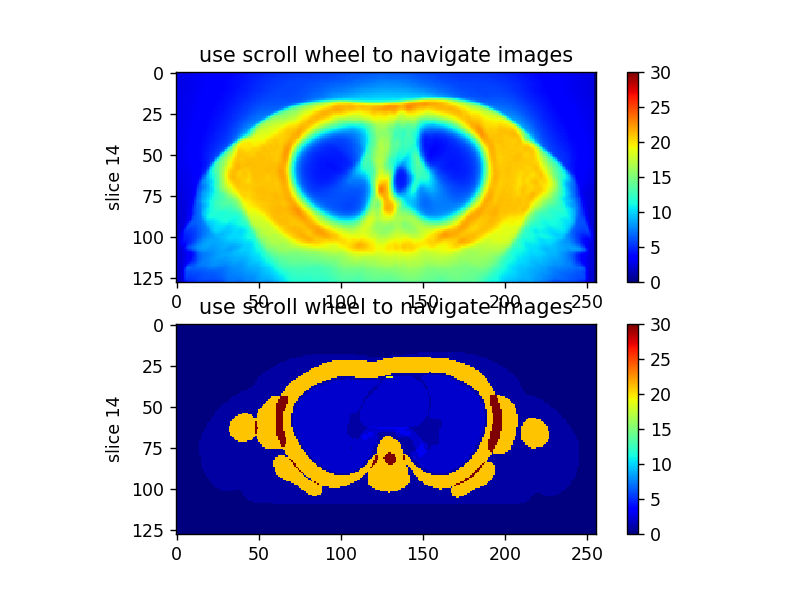

In [123]:
scan_scaled_display = np.zeros(scan_scaled[:,:,:,0].shape)
np.squeeze(scan_scaled_display)
    
for i in range(0,scan_scaled.shape[3]):
    scan_scaled_display = scan_scaled_display+scan_scaled[:,:,:,i]

fig, (ax1, ax2)= plt.subplots(2, 1)
tracker1 = IndexTracker(ax1, np.squeeze(dose_estimate), fig,0,30)
fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)
tracker2 = IndexTracker(ax2, scan_scaled_display, fig,0,30)
fig.canvas.mpl_connect('scroll_event', tracker2.onscroll)
plt.show()

In [ ]:
def get_dataset(dataset_path, save_npy = False, dataset_save_path = 'Data/npy_dataset', batch_size = 1, augmentation = False, normalization=False):
    # Create dateset:
    data_folder = dataset_path+'/'
    data_dirs = listdir(data_folder)
    scans = []
    dose_imgs = []
    i = 0
    
    if not os.path.isdir(data_folder+data):
        f = loadmat(data_folder+data)
        scan = f['structset_2d_channel']
        dose_img = f['doseset_2d']
        dose_img = np.expand_dims(dose_img,axis=3)
        scan = np.array(scan, dtype='float32')
        dose_img = np.array(dose_img).astype('float32')
        if normalization:
            print('start normalization')
            mask = scan>0
            mask_Lung = np.squeeze(mask[:,:,:,7])
            mask_Lung = mask_Lung.flatten()
            dose_flat = dose_img.flatten()
            dose_masked =  np.ma.masked_where(mask_Lung==False, dose_flat)
            dose_Lung = dose_masked.compressed()
            print('orignal lung mean dose',dose_Lung.mean())
            dose_img = dose_img/dose_Lung.mean()*8.0
                
        print('scan shape and dose shape=',scan.shape, dose_img.shape)
        if(i==0):
            scans = scan
            dose_imgs = dose_img
            i = 1
        else:
            print('add new patient data')
            scans= np.concatenate((scans,scan),axis=0)
            dose_imgs=np.concatenate((dose_imgs,dose_img),axis=0)
        if augmentation:
            print('start augmentation')
            scan_flip = np.flip(scan,2)
            dose_img_flip = np.flip(dose_img,2)
            scans= np.concatenate((scans,scan_flip),axis=0)
            dose_imgs=np.concatenate((dose_imgs,dose_img_flip),axis=0)
    

    print('Scan Data Shape: ' + str(scans.shape))
    print('Segmantation Data Shape: ' + str(dose_imgs.shape))

    if save_npy:
        if not os.path.exists(dataset_save_path):
            os.makedirs(dataset_save_path)
        np.save(dataset_save_path+'/structures.npy', scans)
        np.save(dataset_save_path+'/dose.npy', dose_imgs)
        print('NPY dataset saved!')
        
    for batch_i in range(0, dose_imgs.shape[0], batch_size):
        batch_npy = np.concatenate((scans[batch_i:batch_i+batch_size],dose_imgs[batch_i:batch_i+batch_size]),axis=3)
        batch_npy = np.array(batch_npy)
        np.save(dataset_save_path+'/batch_{0}.npy'.format(batch_i), batch_npy)
  #  X, X_test, Y, Y_test = train_test_split(scans, dose_imgs, test_size=validation_size, random_state=42)
  #  print('Train Data Shape: ' + str(X.shape[0]))
  #  print('Test Data Shape: ' + str(X_test.shape[0]))
    return scans, dose_imgs